In [47]:
import os
import cv2
import numpy as np
import mediapipe as mp
from keras.utils import np_utils
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [48]:
raw_ds_path = r'F:\Artificial Intelligence\Datasets\Drowsiness Detection Dataset with Yawning\Yawning' 
processed_ds_path = r"F:\Artificial Intelligence\Deep Learning\Drowsiness Detection\Yawning Detection\dataset"
data, target = [], []

In [50]:
mp_face_detect = mp.solutions.face_detection

face_detect = mp_face_detect.FaceDetection (
    min_detection_confidence=0.6
)

In [49]:
sub_dirs = os.listdir(raw_ds_path)
sub_dirs

['no_yawn', 'yawn']

In [51]:
class_labels = {}
label = 0

for dir in sub_dirs:
    class_labels[dir] = label
    label += 1

class_labels

{'no_yawn': 0, 'yawn': 1}

In [33]:
img_counts = {}
empty_img_count = 0

for dir in sub_dirs:
    if dir not in img_counts:
        img_counts[dir] = 0

    face_save_dir_path = os.path.join(processed_ds_path, dir)
    ds_class_path = os.path.join(raw_ds_path, dir)
    img_files = os.listdir(ds_class_path)

    for file in img_files:
        img_file_path = os.path.join(ds_class_path, file)
        img = cv2.imread(img_file_path)
        height, width, _ = img.shape
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        face_detect_results = face_detect.process(img)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

        if face_detect_results.detections:
            for face in face_detect_results.detections:
                rel_bound_rect = face.location_data.relative_bounding_box
                face_x, face_w, face_y, face_h = int(rel_bound_rect.xmin * width), int(rel_bound_rect.width * width), int(rel_bound_rect.ymin * height), int(rel_bound_rect.height * height)
                face_img = img[face_y: face_y + face_h, face_x: face_x + face_w]
                face_save_path = os.path.join(face_save_dir_path, f'{img_counts[dir]}.jpg')
                
                try:
                    cv2.imwrite(face_save_path, face_img)
                    img_counts[dir] += 1
                except:
                    empty_img_count += 1
                    
img_counts

{'no_yawn': 721, 'yawn': 723}

In [27]:
empty_img_count

4

In [52]:
for dir in sub_dirs:
    processed_ds_dir_path = os.path.join(processed_ds_path, dir)
    processed_img_files = os.listdir(processed_ds_dir_path)

    for file in processed_img_files:
        img_file_path = os.path.join(processed_ds_dir_path, file)
        img = cv2.imread(img_file_path)
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        res_img = cv2.resize(gray_img, (48, 48))
        
        data.append(res_img)
        target.append(class_labels[dir])

data = np.array(data)
target = np.array(target)   

print(data.shape)
print(target.shape)

(1444, 48, 48)
(1444,)


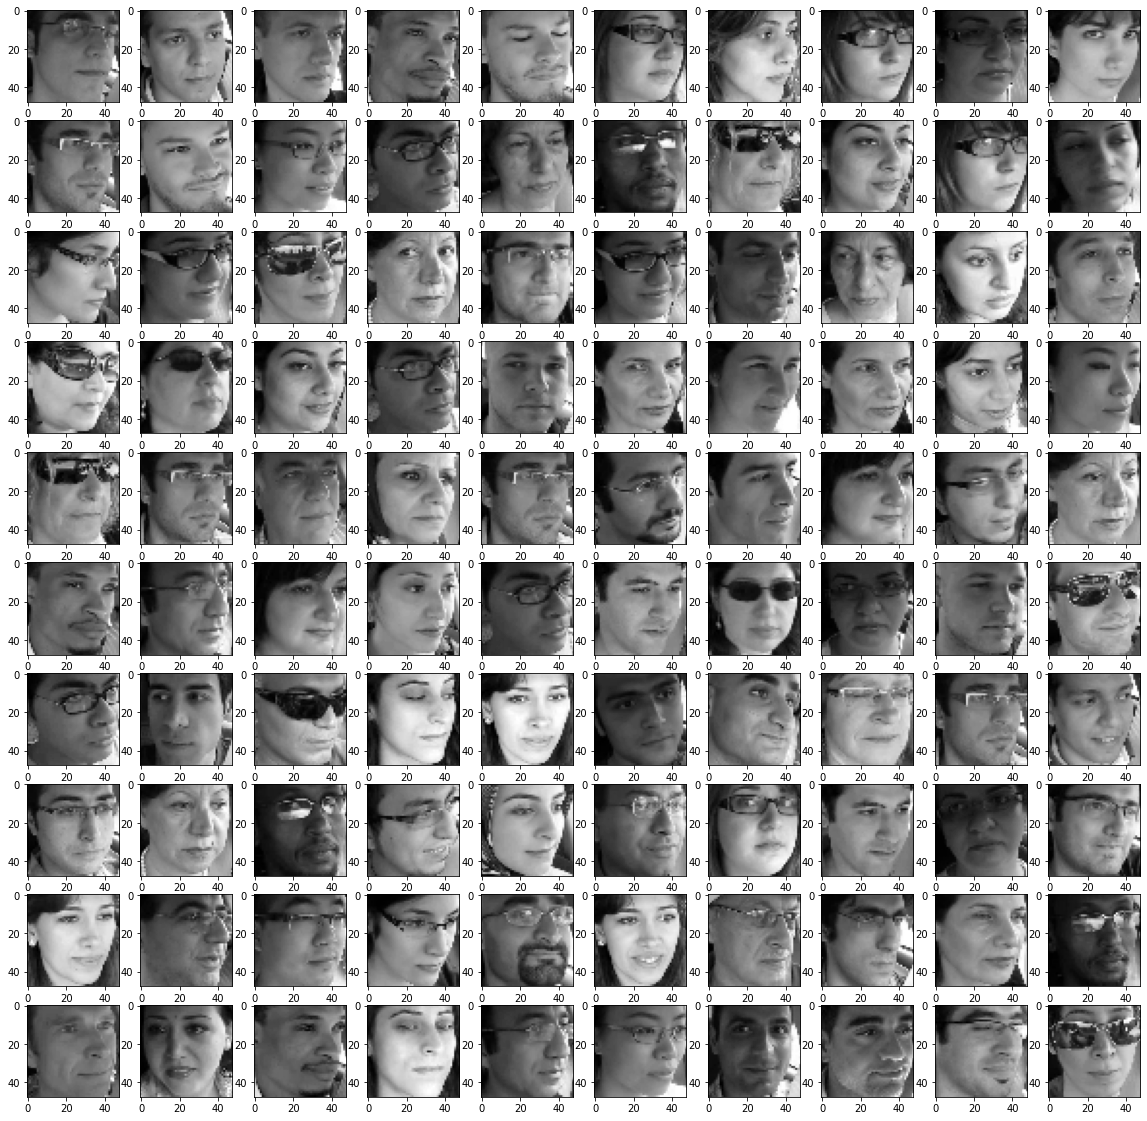

In [54]:
no_yawn_shuffled_data = shuffle(data[0:img_counts['no_yawn'] + 1])
rows, cols = 10, 10

plt.figure(figsize=(20, 20))

for i in range(rows * cols):
  plt.subplot(cols, rows, i+1)
  plt.imshow(no_yawn_shuffled_data[i].reshape(48, 48, 1), cmap='gray')
plt.show()

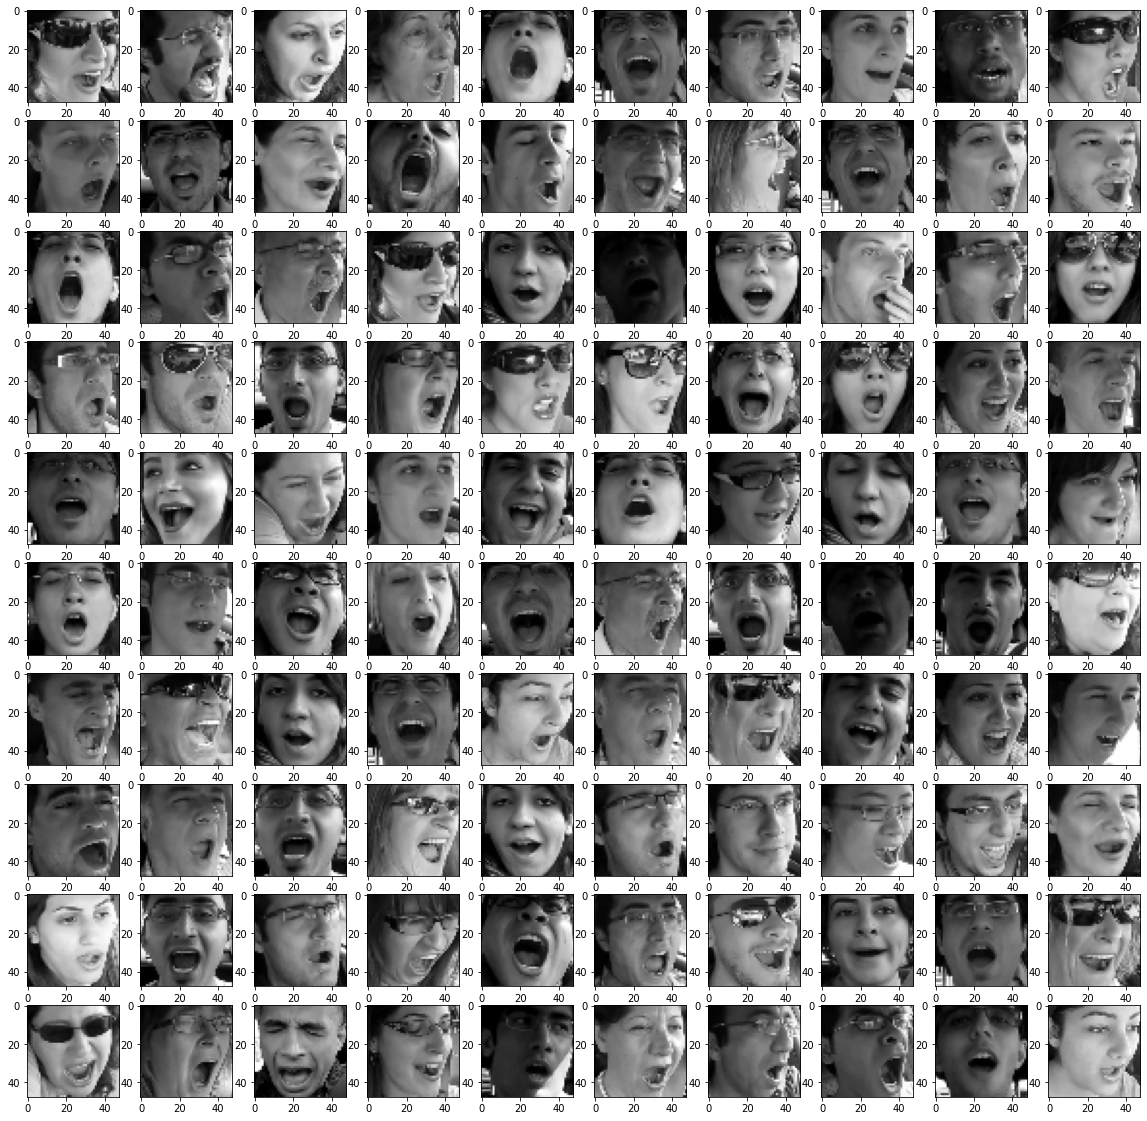

In [55]:
yawn_shuffled_data = shuffle(data[img_counts['no_yawn']:])
rows, cols = 10, 10

plt.figure(figsize=(20, 20))

for i in range(rows * cols):
  plt.subplot(cols, rows, i+1)
  plt.imshow(yawn_shuffled_data[i].reshape(48, 48, 1), cmap='gray')
  
plt.show()

In [56]:
train_data, test_data, train_labels, test_labels = train_test_split(data, target, test_size=0.2)

In [57]:
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(1155, 48, 48) (1155,)
(289, 48, 48) (289,)


In [58]:
train_data = train_data / 255.0
test_data = test_data / 255.0

In [60]:
train_data = np.reshape(train_data, (train_data.shape[0], train_data.shape[1], train_data.shape[2], 1))
test_data = np.reshape(test_data, (test_data.shape[0], test_data.shape[1], test_data.shape[2], 1))

train_labels = np_utils.to_categorical(train_labels)
test_labels = np_utils.to_categorical(test_labels)

In [61]:
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(1155, 48, 48, 1) (1155, 2)
(289, 48, 48, 1) (289, 2)


In [94]:
np.save("../numpy/train_data.npy", train_data)
np.save("../numpy/test_data.npy", test_data)
np.save("../numpy/train_labels.npy", train_labels)
np.save("../numpy/test_labels.npy", test_labels)